# Overfitting

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

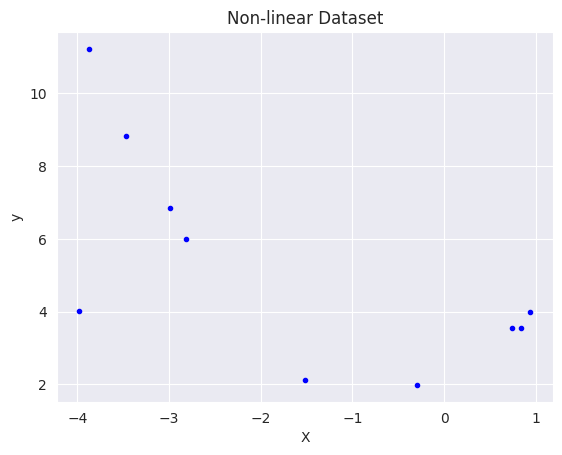

In [ ]:
np.random.seed(10)

n = 10 # 100 data points
X = 6 * np.random.rand(n, 1) - 4
y = X**2 + 2 * X + 3 + np.random.rand(n,1)

agrs = np.argwhere(y < 6)[:, 0]
X[agrs] *= 1.5
y[agrs] *= 0.75

# plotting the dataset
plt.plot(X, y,'b.')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Non-linear Dataset')
plt.grid(True)

## Initialize

In [ ]:
poly_features = PolynomialFeatures(degree=9)
X_poly = poly_features.fit_transform(X)


# check the extened polynomial features of the first data point
print('Original feature:', X[0])
print('Polynomial features', X_poly[0])

Original feature: [0.94188579]
Polynomial features [1.         0.94188579 0.88714884 0.83559289 0.78703306 0.74129526
 0.69821547 0.65763923 0.61942105 0.58342388]


## Fit

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_, lin_reg.coef_ # check the bais term and feature weights of the trained model

(array([-1.19546226]),
 array([[  0.        ,  -3.31122236,  28.18619086,   2.15490625,
         -34.00669671,  -9.68490434,  12.42831719,   8.38739838,
           1.8937892 ,   0.14928529]]))

### Score on the train dataset

In [ ]:
lin_reg.score(X_poly, y)

1.0

In [ ]:
np.abs(lin_reg.predict(X_poly) - y).sum()

2.907267759866272e-10

### Test

In [ ]:
def test_lin_reg_plot(regresison_model, X, y):
    X_test = np.linspace(-4.5, 2, num=100).reshape(-1, 1)
    X_new_poly = poly_features.fit_transform(X_test) # compute the polynomial features
    y_predict = regresison_model.predict(X_new_poly) # make predictions using trained Linear Regression model

    # plot the original dataset and the prediction results
    fig,ax = plt.subplots()
    ax.plot(X, y, 'b.', label='Training date samples')
    ax.plot(X_test, y_predict,'g-', linewidth=2, label='Predictions')
    ax.set_xlabel('X')
    ax.set_ylabel('y')
    ax.legend()
    ax.axis([-4.5, 2, 0.5, 12])
    ax.grid(True)

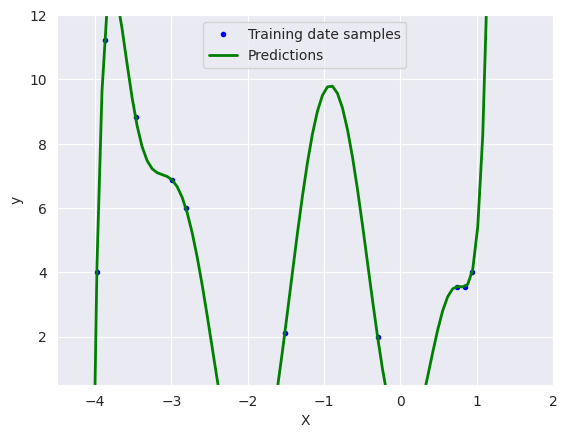

In [ ]:
test_lin_reg_plot(lin_reg, X, y)

# Regularizations

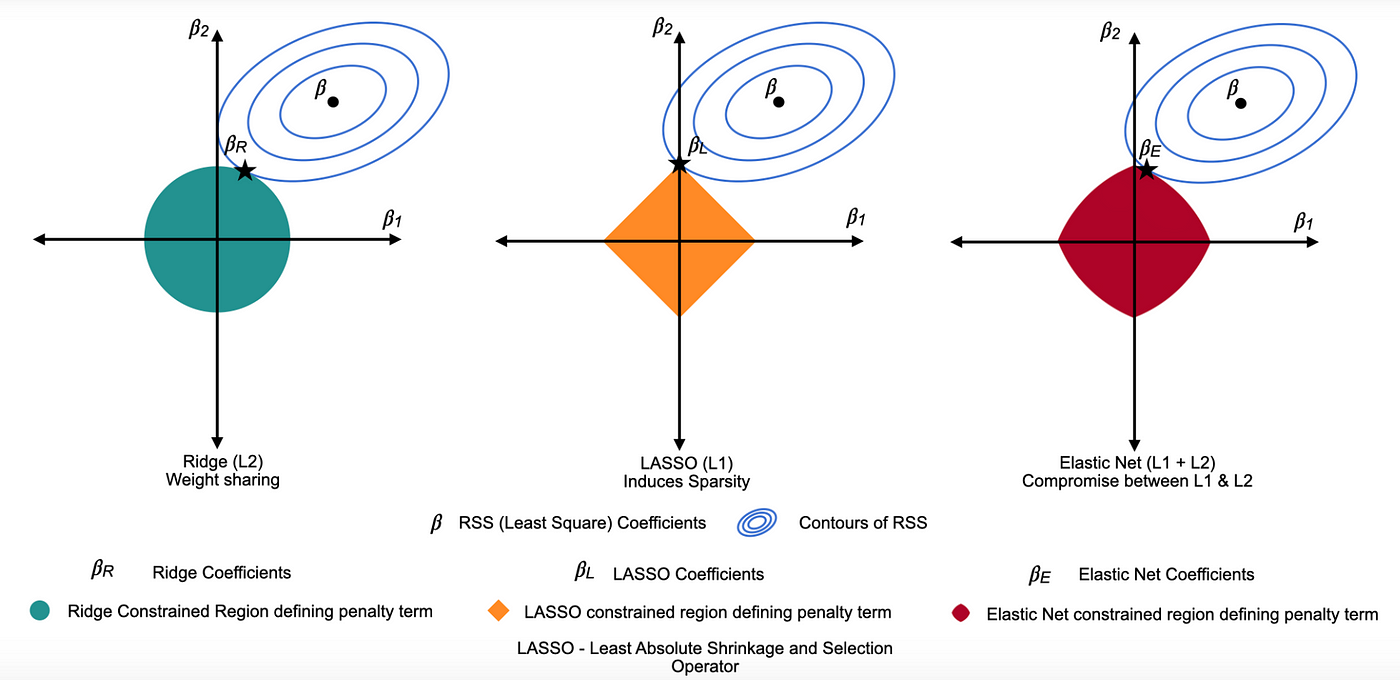

# L2 Regularization (Ridge)

In [ ]:
# alpha = 10
# degree = 9

In [ ]:
from sklearn import linear_model
ridge_reg = linear_model.Ridge(alpha=10)
ridge_reg.fit(X_poly, y)
ridge_reg.coef_, ridge_reg.intercept_

(array([[ 0.        ,  0.24164258,  0.00384377,  0.13939698,  0.14230571,
         -0.12638951,  0.21617199,  0.27871903,  0.09329934,  0.00987412]]),
 array([2.6838381]))

## Test

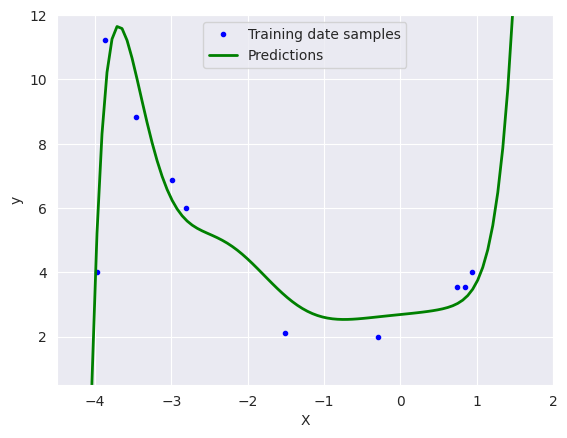

In [ ]:
test_lin_reg_plot(ridge_reg, X, y)

# L1 Regularizaiton (Lasso)

In [ ]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha=0.1)
reg.fit([[0, 0], [1, 1]], [0, 1])
reg.predict([[1, 1]])

array([0.8])

In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

X, y = load_iris(return_X_y=True)
clf = LogisticRegression(penalty="l1", solver="liblinear", random_state=0).fit(X, y)
clf.predict(X[:2, :])

clf.predict_proba(X[:2, :])

clf.score(X, y)

0.96

# Оцінка якості алгоритмів

## Відкладена вибірка

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

# Cross-validation

In [ ]:
# STRATIFIES K-FOLD CROSS VALIDATION { 10-fold }

# Import Required Modules.
from statistics import mean, stdev
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn import datasets
import pandas as pd

In [ ]:
# FEATCHING FEATURES AND TARGET VARIABLES IN ARRAY FORMAT.
cancer = datasets.load_breast_cancer()

In [ ]:
df_cancer = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
df_cancer['target'] = cancer.target
df_cancer

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


<Axes: >

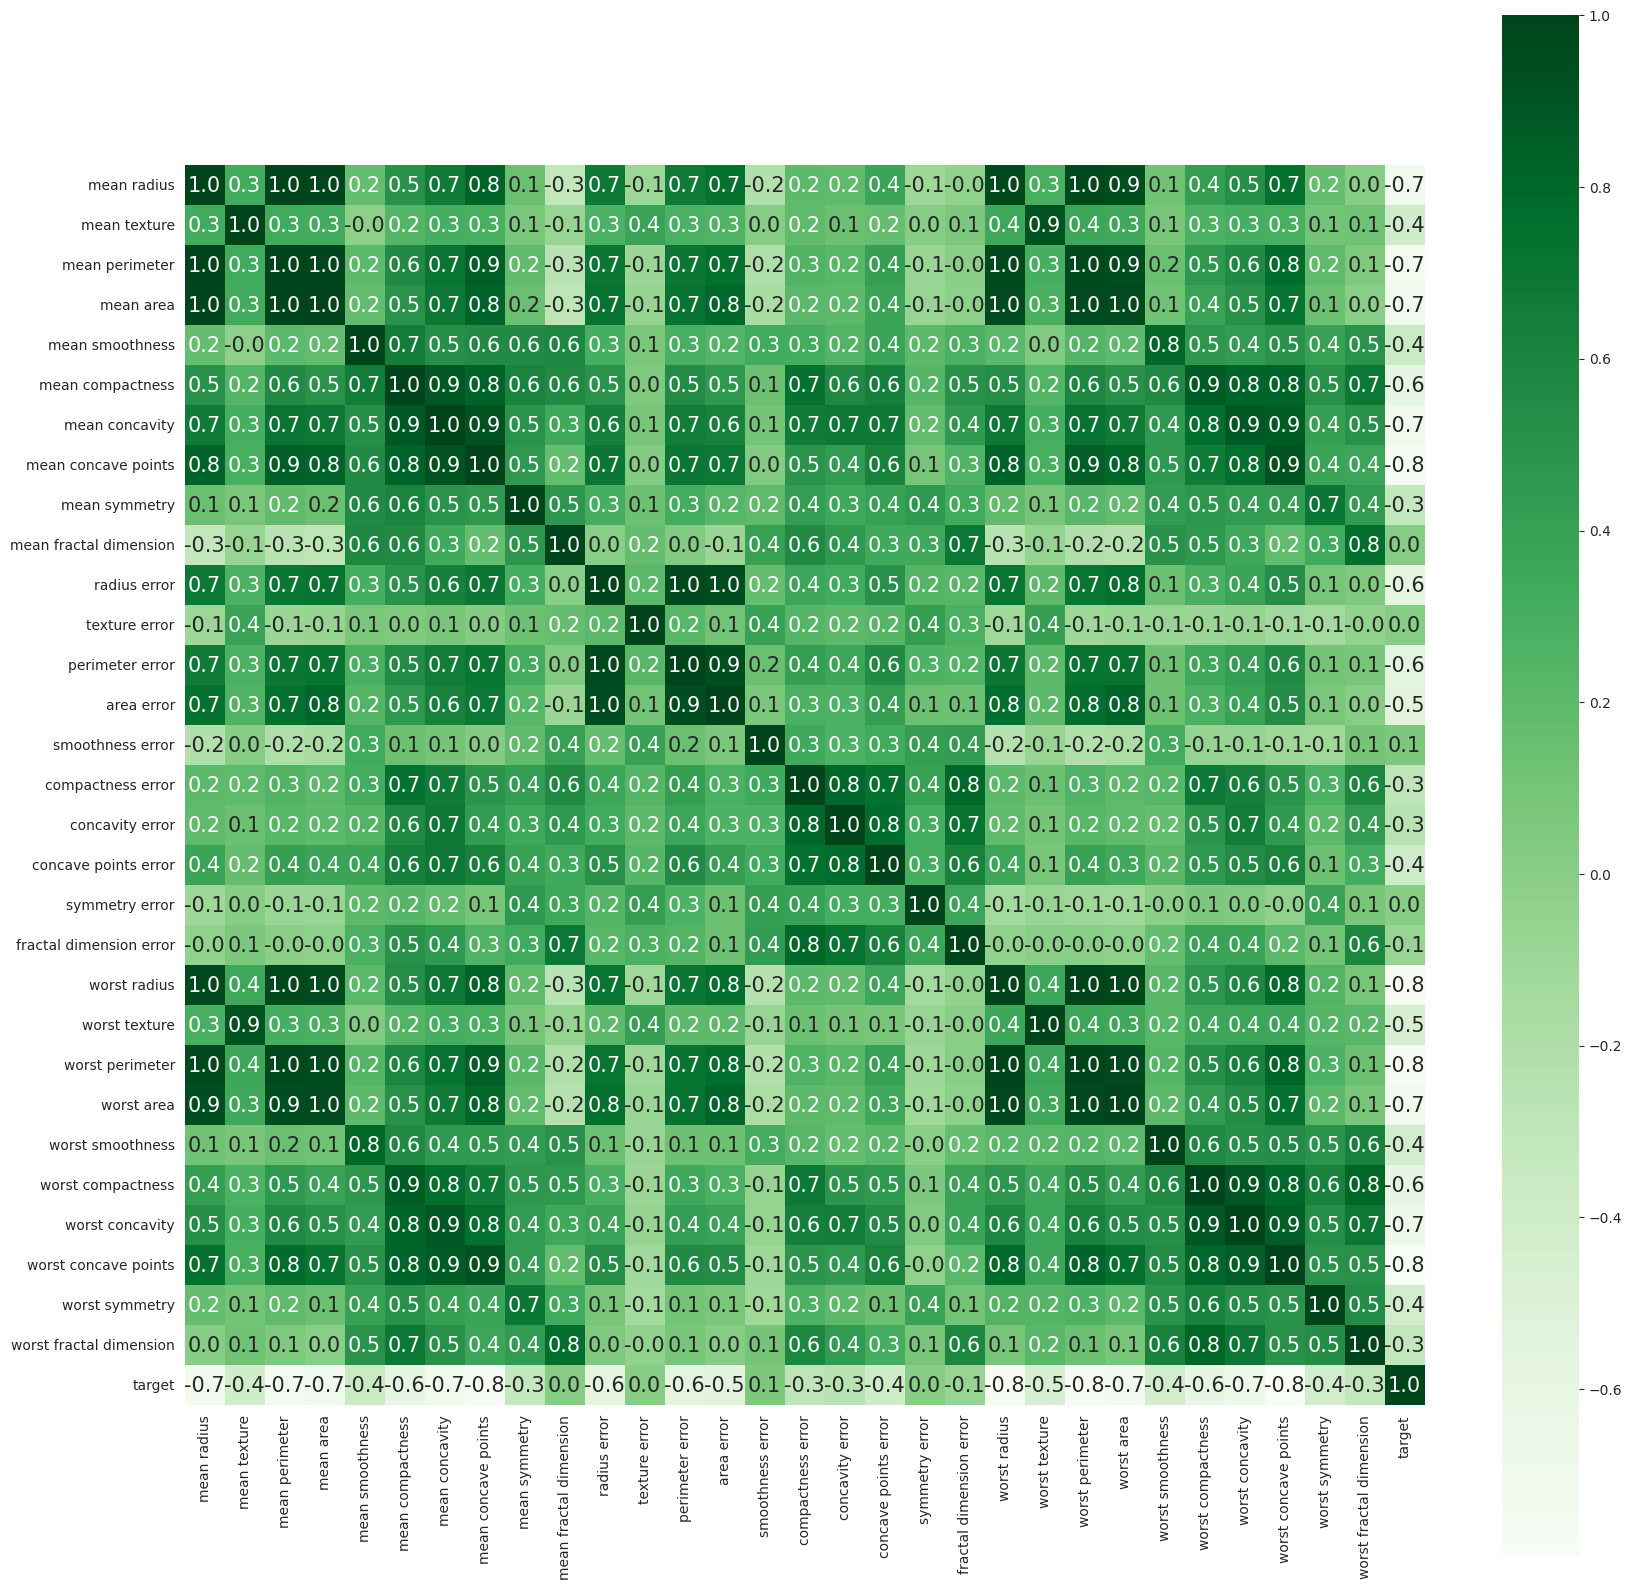

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display correlation
corr = df_cancer.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

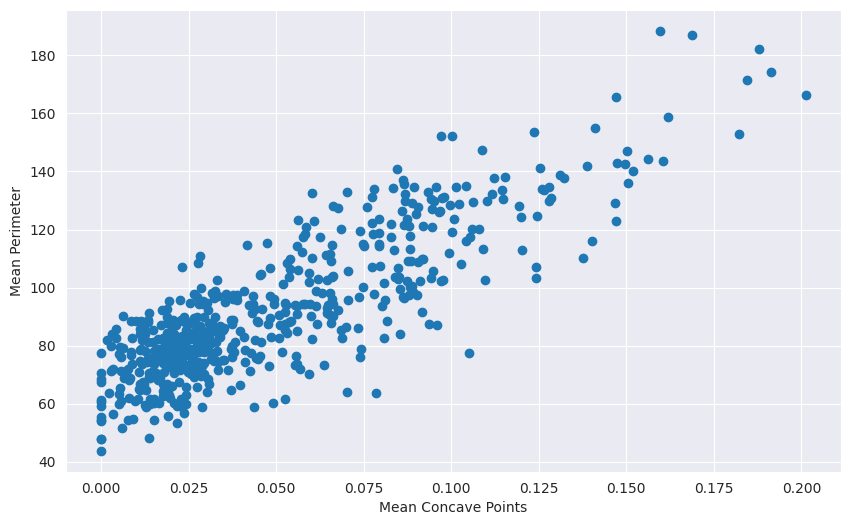

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(df_cancer['mean concave points'], df_cancer['mean perimeter'])
plt.xlabel('Mean Concave Points')
plt.ylabel('Mean Perimeter')
plt.show()

In [ ]:
# Input_x_Features.
x = np.array(df_cancer['mean concave points']).reshape(-1, 1)

# Input_ y_Target_Variable.
y = np.array(df_cancer['mean perimeter']).reshape(-1, 1)

In [ ]:
# Feature Scaling for input features.
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)

# Create classifier object.
lr = linear_model.LinearRegression()

# Create dKFold object.
kf = KFold(n_splits=10, shuffle=True, random_state=42)

In [ ]:
lst_accu_kfold = []
for train_index, test_index in kf.split(x, y):
	x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index]
	y_train_fold, y_test_fold = y[train_index], y[test_index]
	lr.fit(x_train_fold, y_train_fold)
	lst_accu_kfold.append(lr.score(x_test_fold, y_test_fold))

In [ ]:
# Print the output.
print('List of possible accuracy:', lst_accu_kfold)
print('\nMaximum Accuracy That can be obtained from this model is:',
	max(lst_accu_kfold)*100, '%')
print('\nMinimum Accuracy:',
	min(lst_accu_kfold)*100, '%')
print('\nOverall Accuracy:',
	mean(lst_accu_kfold)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_kfold))

List of possible accuracy: [0.779431029400333, 0.7816062896073203, 0.7220988845419649, 0.65826369074339, 0.5773947027409738, 0.7917158991424204, 0.5962556592177544, 0.6840854292422092, 0.7328566175736916, 0.762519648278152]

Maximum Accuracy That can be obtained from this model is: 79.17158991424203 %

Minimum Accuracy: 57.739470274097386 %

Overall Accuracy: 70.8622785048821 %

Standard Deviation is: 0.07739072693581367


# GridSearch

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'alpha': (0.5, 1.0, 1.5, 2),
}

lr_ridge = linear_model.Ridge()
gs_cv = GridSearchCV(lr_ridge, parameters, cv=3)
gs_cv.fit(x, y)

GridSearchCV(cv=3, estimator=Ridge(), param_grid={'alpha': (0.5, 1.0, 1.5, 2)})

In [ ]:
gs_cv.cv_results_

{'mean_fit_time': array([0.00191569, 0.00106049, 0.0007987 , 0.00069992]),
 'std_fit_time': array([4.10620523e-04, 1.48593252e-04, 8.82917361e-05, 2.79416900e-05]),
 'mean_score_time': array([0.00085163, 0.00055321, 0.00045864, 0.00037464]),
 'std_score_time': array([2.10688202e-04, 2.46494014e-05, 8.03885163e-05, 2.28130024e-06]),
 'param_alpha': masked_array(data=[0.5, 1.0, 1.5, 2],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 0.5}, {'alpha': 1.0}, {'alpha': 1.5}, {'alpha': 2}],
 'split0_test_score': array([0.5701743 , 0.43542811, 0.34687099, 0.28675578]),
 'split1_test_score': array([0.53348404, 0.39867228, 0.31419761, 0.25765602]),
 'split2_test_score': array([0.56275012, 0.41551349, 0.32192394, 0.25865323]),
 'mean_test_score': array([0.55546949, 0.41653796, 0.32766418, 0.26768834]),
 'std_test_score': array([0.01583876, 0.01502298, 0.01394274, 0.01348886]),
 'rank_test_score': array([1, 2, 3, 4], dtype=

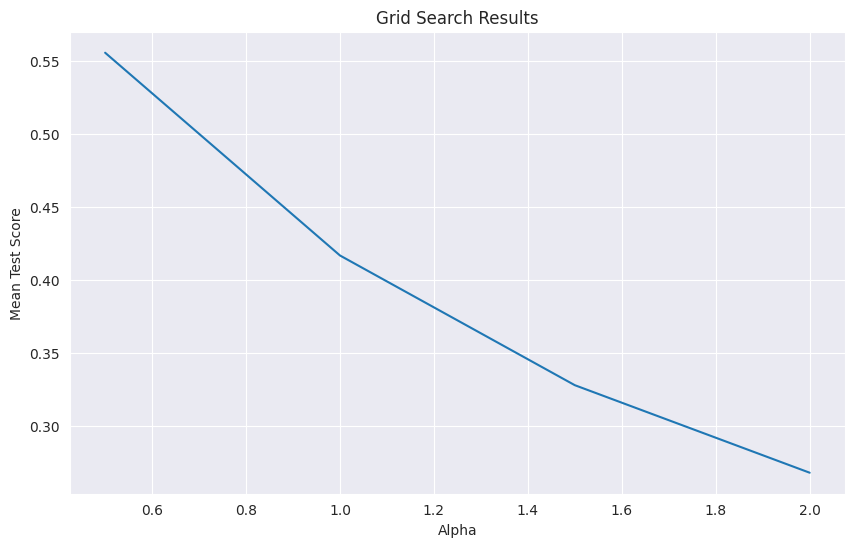

In [ ]:
df_cv_results = pd.DataFrame(gs_cv.cv_results_)
df_cv_results

plt.figure(figsize=(10,6))
plt.plot(df_cv_results['param_alpha'], df_cv_results['mean_test_score'])
plt.xlabel('Alpha')
plt.ylabel('Mean Test Score')
plt.title('Grid Search Results')
plt.show()